In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1st Part: EDA and Data Cleaning

In [44]:
# Load the dataset
df = pd.read_csv(r"C:\Users\amcys\Documents\02.Education\01.Online Education\03.DataTech Florida - Jerry Strazzeri\09.Trabalhos Finais\Walmart Project\Data\Final_database_V1.csv")
pd.set_option('display.max_columns', None)
df[df['customer_name'] == 'Amy Harrison'].head(5)

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,product_name,category,price
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN
2551,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2552,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2553,2023-05-16,6f39dc4f-cb53-49d7-8fe3-ac48cd8e14b4,375.27,Apopka,6,2,14:37:31,WCID5040,Amy Harrison,72,WDID09889,Carla James,18,66,Broccoli,Pantry,4.38
2777,2023-05-24,92853ff5-345c-4f40-aac9-c860151dc660,454.02,Winter Park,13,0,17:41:56,WCID5040,Amy Harrison,72,WDID10527,Matthew Brown,48,68,NaN,NaN,NaN


In [45]:
# Here we already can check a datatype error: date and delivery_hour columns are set as "object" and not time and datetime
# Other mistake is the labeling of the last three rows, they must be clearer

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10161 entries, 0 to 10160
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             10161 non-null  object 
 1   order_id         10161 non-null  object 
 2   order_amount     10161 non-null  float64
 3   region           10161 non-null  object 
 4   items_delivered  10161 non-null  int64  
 5   items_missing    10161 non-null  int64  
 6   delivery_hour    10161 non-null  object 
 7   customer_id      10161 non-null  object 
 8   customer_name    10161 non-null  object 
 9   customer_age     10161 non-null  int64  
 10  driver_id        10161 non-null  object 
 11  driver_name      10161 non-null  object 
 12  driver_age       10161 non-null  int64  
 13  driver_trips     10161 non-null  int64  
 14  product_name     1662 non-null   object 
 15  category         1662 non-null   object 
 16  price            1662 non-null   float64
dtypes: float64(2

In [46]:
# Another suspect thing happening is that for some registers, the value lost is bigger than the order price
# We can assume that the "order_amount" is the value without the lost product(s) prices
# This is a data we got in the end of the year, the person probably got time to have his refund. That can be a cause
# We'll create an extra column with the real_order_amount

df[df['price'] > 0.1].head(5)

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,product_name,category,price
18,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Hummus,Pantry,7.92
19,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Olive Oil,Pantry,6.09
20,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Croutons,Pantry,13.31
21,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Ground Beef,Pantry,13.27
22,2023-02-13,fe4bffcc-e466-4f05-b111-777a4808abcd,980.99,Sanford,15,1,12:10:18,WCID5145,Joshua Davis,34,WDID10066,Ryan Gomez,18,60,Flour,Pantry,3.48


In [47]:
# Correct date column type 

df['date'] = pd.to_datetime(df['date'])
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10161 entries, 0 to 10160
Series name: date
Non-Null Count  Dtype         
--------------  -----         
10161 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 79.5 KB


In [48]:
# Correct delivery_hour to time

df['delivery_hour'] = pd.to_datetime(df['delivery_hour'], format='%H:%M:%S', errors='coerce').dt.time
type(df['delivery_hour'].iloc[0])

datetime.time

In [49]:
# Rename Last Three Columns

df = df.rename(columns={'product_name': 'missing_product_name', 
                   'category': 'missing_product_category',
                   'price': 'product_amount_price'})
df.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN


In [50]:
# Total orders per client
df_nodup = df.drop_duplicates()
total_orders = df_nodup.groupby('customer_id')['order_id'].count()
df_nodup['customer_orders'] = df_nodup['customer_id'].map(total_orders)
df_nodup.head()

C:\Users\amcys\AppData\Local\Temp\ipykernel_3120\73701969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup['customer_orders'] = df_nodup['customer_id'].map(total_orders)


,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN,5


In [51]:
# Create New dataset with only orders with lost products
df_lost = df_nodup[df_nodup['product_amount_price'] > 0]
df_lost.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
18,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Hummus,Pantry,7.92,7
19,2023-02-13,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,78.28,Clermont,10,2,05:57:03,WCID5065,Bruce Ruiz,48,WDID10064,Charlotte Davila,18,37,Olive Oil,Pantry,6.09,7
20,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Croutons,Pantry,13.31,12
21,2023-02-13,de6343f9-fa09-4cac-8da8-7c2706825e22,133.73,Sanford,13,2,11:20:24,WCID5028,Allison Barker,88,WDID10389,Megan Smith,24,64,Ground Beef,Pantry,13.27,12
22,2023-02-13,fe4bffcc-e466-4f05-b111-777a4808abcd,980.99,Sanford,15,1,12:10:18,WCID5145,Joshua Davis,34,WDID10066,Ryan Gomez,18,60,Flour,Pantry,3.48,9


In [52]:
df_lost[df_lost['customer_name'] == 'Sharon Allen']

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders
1418,2023-04-05,6d98ef23-9d70-49d3-a9f5-1fb0fc1445f3,44.38,Sanford,7,1,03:51:43,WCID5903,Sharon Allen,34,WDID10069,Ms. Lindsay Carpenter,19,77,Chicken Wings,Pantry,19.38,1
4404,2023-12-16,4921c95d-5a84-482c-be25-67b554a4303a,206.76,Altamonte Springs,8,1,07:01:21,WCID5729,Sharon Allen,45,WDID10673,Jasmine Nash,59,61,Uncured Bacon,Pantry,4.67,8
7243,2023-09-27,babe85c8-3680-4809-9312-24507904042f,492.83,Clermont,3,1,17:40:29,WCID5729,Sharon Allen,45,WDID10548,Chase Ball,47,19,Shredded Carrots,Pantry,13.83,8
8840,2023-06-30,c07bbd53-89a3-4c01-9b9d-729d30553e52,452.38,Clermont,9,1,12:48:03,WCID5729,Sharon Allen,45,WDID10624,Carrie Savage,49,72,Granola Bars,Pantry,8.23,8


In [53]:
# Create a new smaller database
df_lost_cost_total = df_lost[['order_id', 'customer_id', 'customer_name', 'customer_orders', 'driver_id', 'driver_name', 'driver_trips']]

# Remove duplicates
df_lost_cost_total = df_lost_cost_total.drop_duplicates()

# Create variables
suspect_customers = df_lost_cost_total['customer_id'].value_counts()
suspect_drivers = df_lost_cost_total['driver_id'].value_counts()

# New 2 columns based on previous variables
df_lost_cost_total['customer_incidence'] = df_lost_cost_total['customer_id'].map(suspect_customers)
df_lost_cost_total['driver_incidence'] = df_lost_cost_total['driver_id'].map(suspect_drivers)

# % of lost orders
df_lost_cost_total['lost_incidence_driver'] = round(df_lost_cost_total['driver_incidence'] / df_lost_cost_total['driver_trips'], 3)
df_lost_cost_total['lost_incidence_customer'] = round(df_lost_cost_total['customer_incidence'] / df_lost_cost_total['customer_orders'], 3)

df_lost_cost_total.head(5)



,order_id,customer_id,customer_name,customer_orders,driver_id,driver_name,driver_trips,customer_incidence,driver_incidence,lost_incidence_driver,lost_incidence_customer
18,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,WCID5065,Bruce Ruiz,7,WDID10064,Charlotte Davila,37,2,4,0.108,0.286
20,de6343f9-fa09-4cac-8da8-7c2706825e22,WCID5028,Allison Barker,12,WDID10389,Megan Smith,64,2,4,0.062,0.167
22,fe4bffcc-e466-4f05-b111-777a4808abcd,WCID5145,Joshua Davis,9,WDID10066,Ryan Gomez,60,2,4,0.067,0.222
23,849e79f0-13bf-4a80-bc02-62c208ebe4cd,WCID5762,Matthew Osborne,8,WDID10730,Kevin Gilmore,11,3,3,0.273,0.375
24,9923a278-e245-4836-aa35-5f6b7f28428f,WCID5228,Mr. Gregory Luna,13,WDID10740,Ronald Doyle,78,4,3,0.038,0.308


In [54]:
# Quantile Segmentation for drivers 
df_lost_cost_total['fraudulent_driver?'] = pd.qcut(df_lost_cost_total['lost_incidence_driver'], q=5, labels=['Very Unlikely', 'Unlikely', 'Maybe', 'Probable', 'Very Probable'])

# Quantile Segmentation for customers
df_lost_cost_total['fraudulent_customer?'] = pd.qcut(df_lost_cost_total['lost_incidence_customer'], q=5, labels=['Very Unlikely', 'Unlikely', 'Maybe', 'Probable', 'Very Probable'])

df_lost_cost_total.head()


,order_id,customer_id,customer_name,customer_orders,driver_id,driver_name,driver_trips,customer_incidence,driver_incidence,lost_incidence_driver,lost_incidence_customer,fraudulent_driver?,fraudulent_customer?
18,3ddfcc22-f1ae-4e28-a87e-fef4b36a0770,WCID5065,Bruce Ruiz,7,WDID10064,Charlotte Davila,37,2,4,0.108,0.286,Probable,Probable
20,de6343f9-fa09-4cac-8da8-7c2706825e22,WCID5028,Allison Barker,12,WDID10389,Megan Smith,64,2,4,0.062,0.167,Unlikely,Unlikely
22,fe4bffcc-e466-4f05-b111-777a4808abcd,WCID5145,Joshua Davis,9,WDID10066,Ryan Gomez,60,2,4,0.067,0.222,Unlikely,Maybe
23,849e79f0-13bf-4a80-bc02-62c208ebe4cd,WCID5762,Matthew Osborne,8,WDID10730,Kevin Gilmore,11,3,3,0.273,0.375,Very Probable,Very Probable
24,9923a278-e245-4836-aa35-5f6b7f28428f,WCID5228,Mr. Gregory Luna,13,WDID10740,Ronald Doyle,78,4,3,0.038,0.308,Very Unlikely,Probable


In [55]:
df_lost_cost_total.sort_values(by='lost_incidence_customer', ascending=False).head()

,order_id,customer_id,customer_name,customer_orders,driver_id,driver_name,driver_trips,customer_incidence,driver_incidence,lost_incidence_driver,lost_incidence_customer,fraudulent_driver?,fraudulent_customer?
1418,6d98ef23-9d70-49d3-a9f5-1fb0fc1445f3,WCID5903,Sharon Allen,1,WDID10069,Ms. Lindsay Carpenter,77,1,4,0.052,1.000,Very Unlikely,Very Probable
270,a61b84d4-a3e9-471f-897f-94930a3562a6,WCID5131,James Vargas,4,WDID10630,Jennifer Collins,64,3,3,0.047,0.750,Very Unlikely,Very Probable
4482,d6318514-2a53-4eaf-9a33-39e6c3fbf359,WCID5131,James Vargas,4,WDID10491,Cristina Martin,57,3,4,0.070,0.750,Unlikely,Very Probable
7169,ab7b4e84-fd36-4033-9b12-f4c3c633d1a6,WCID5131,James Vargas,4,WDID10093,Justin Gregory,56,3,4,0.071,0.750,Maybe,Very Probable
4479,0718e76d-daea-4e83-a901-928fb8550c25,WCID5711,Matthew Barker,3,WDID10733,Carla Ramirez,74,2,3,0.041,0.667,Very Unlikely,Very Probable


In [56]:
# Check the driver's intervals
bins = pd.qcut(df_lost_cost_total['lost_incidence_driver'], q=5)
bins.unique()

[(0.093, 0.138], (0.055, 0.07], (0.138, 0.364], (0.037, 0.055], (0.07, 0.093]]
Categories (5, interval[float64, right]): [(0.037, 0.055] < (0.055, 0.07] < (0.07, 0.093] < (0.093, 0.138] < (0.138, 0.364]]

In [57]:
# Check the customer's intervals
bins = pd.qcut(df_lost_cost_total['lost_incidence_customer'], q=5)
bins.unique()

[(0.25, 0.333], (0.143, 0.2], (0.2, 0.25], (0.333, 1.0], (0.061, 0.143]]
Categories (5, interval[float64, right]): [(0.061, 0.143] < (0.143, 0.2] < (0.2, 0.25] < (0.25, 0.333] < (0.333, 1.0]]

In [58]:
# Reordering the columns
# This will become a new table in our Power BI

cols = [
    'order_id',
    'customer_id',
    'customer_name',
    'customer_orders',
    'customer_incidence',
    'lost_incidence_customer',
    'fraudulent_customer?',
    'driver_id',
    'driver_name',
    'driver_trips',
    'driver_incidence',
    'lost_incidence_driver',
    'fraudulent_driver?'
]

df_lost_cost_total = df_lost_cost_total[cols]
df_lost_cost_total.head()

df_lost_cost_customers = df_lost_cost_total[['customer_id', 
                                            'customer_name',
                                            'customer_orders', 
                                            'customer_incidence', 
                                            'lost_incidence_customer', 
                                            'fraudulent_customer?']]

df_lost_cost_drivers = df_lost_cost_total[['driver_id',
                                          'driver_name',
                                          'driver_trips',
                                          'driver_incidence',
                                          'lost_incidence_driver',
                                          'fraudulent_driver?']]

#Now we have the data of the customers that had a incidence
df_lost_cost_customers.drop_duplicates()

#The same with the drivers
df_lost_cost_drivers.drop_duplicates()

,driver_id,driver_name,driver_trips,driver_incidence,lost_incidence_driver,fraudulent_driver?
18,WDID10064,Charlotte Davila,37,4,0.108,Probable
20,WDID10389,Megan Smith,64,4,0.062,Unlikely
22,WDID10066,Ryan Gomez,60,4,0.067,Unlikely
23,WDID10730,Kevin Gilmore,11,3,0.273,Very Probable
24,WDID10740,Ronald Doyle,78,3,0.038,Very Unlikely
...,...,...,...,...,...,...
7222,WDID10626,Michael Wise,56,3,0.054,Very Unlikely
7588,WDID10257,Paul Lyons,29,4,0.138,Probable
7615,WDID10560,Justin Randall,60,3,0.050,Very Unlikely
8343,WDID10695,Elizabeth Williams,67,3,0.045,Very Unlikely


In [59]:
# ==================Important Comment!===============================
#
# In our df we have this dilemma:
#| Order_id | Items Missing | missing_product_name | customer_orders
#| -------- | ------------- | -------------------- | ---------------
#| 1        | 2             | apple                | 11
#| 1        | 2             | apple                | NaN
#| 2        | 2             | TV                   | 5
#| 2        | 2             | Bread                | 5
#
# 1. For the order_id 1, we clearly have a duplicate value. This was already treated, getting the df_nodup dataset
# 2. For the second case, we just need to remove all those values that are null in "customer_orders"
# 3. For the third case
# Solving this problem will let us calculate the total_amount_lost
# We will use Bruce Ruiz as an Example
# ==================Important Comment!===============================

#df_nodup[(df_nodup['customer_orders'].notna()) & (df_nodup['items_missing'] == 2)]
total_lost = df.groupby('order_id')['items_missing'].max()

#df_nodup

df_bruce = df_nodup[
    (df_nodup['customer_orders'].notna()) &
    (df_nodup['missing_product_name'].notna())
].copy() 

#Number_of_lost_items will count the lost products by quantity
#Number_of_items will count the lost products by type
df_bruce['number_of_lost_items'] = df_bruce.groupby('order_id')['items_missing'].transform('max')
df_bruce['number_of_items'] = df_bruce.groupby('order_id')['missing_product_name'].transform('nunique')

#If they are equal = 1, otherwise = 0
df_bruce['Check'] = (df_bruce['number_of_lost_items'] == df_bruce['number_of_items'])*1

#If the check = 0, we can multiply the product_amount_price for the number_of_lost_items
df_bruce['multiplier'] = np.where(df_bruce['Check'] == 0, 
                                  df_bruce['number_of_lost_items'],
                                  1)



In [60]:
#Column 'Multiplier' in main dataset
right = df_bruce[['order_id','multiplier']].drop_duplicates('order_id')
df_nodup = df_nodup.merge(right, on='order_id', how='left')


In [61]:
#Calculating the total real value
df_nodup['total_lost_value'] = df_nodup['product_amount_price'] * df_nodup['multiplier']

In [62]:
#Quick check
df_nodup[df_nodup['customer_name'] == 'Elijah Taylor']

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,multiplier,total_lost_value
26,2023-02-13,1543d453-775c-4e45-91df-5bc80d42424f,585.48,Apopka,11,0,10:39:42,WCID5170,Elijah Taylor,30,WDID10599,Seth Molina,47,32,NaN,NaN,NaN,16,NaN,NaN
287,2023-02-22,d0f85538-bc5f-4cd6-80ab-921a892523c4,437.74,Sanford,3,0,04:31:31,WCID5170,Elijah Taylor,30,WDID10180,Debbie Gross,20,60,NaN,NaN,NaN,16,NaN,NaN
640,2023-03-07,15c60387-159c-4c44-a4c3-d5801f0e712a,277.88,Altamonte Springs,9,0,14:17:29,WCID5170,Elijah Taylor,30,WDID10056,Heather Gibson,18,21,NaN,NaN,NaN,16,NaN,NaN
1245,2023-03-28,d6dbf725-c1a0-438d-b8b6-fe02e91ffbe9,36.75,Altamonte Springs,3,0,08:52:33,WCID5170,Elijah Taylor,30,WDID09955,Taylor Gray,18,63,NaN,NaN,NaN,16,NaN,NaN
1341,2023-04-02,a953956f-aa41-4b5c-865d-9ee8d5d4422f,457.80,Kissimmee,10,0,11:01:59,WCID5170,Elijah Taylor,30,WDID10756,Sherry Dunn,56,50,NaN,NaN,NaN,16,NaN,NaN
1630,2023-04-12,f79a36c7-8a12-438f-8b67-257728a38810,334.63,Clermont,13,0,09:53:37,WCID5170,Elijah Taylor,30,WDID11009,Deborah Juarez,52,32,NaN,NaN,NaN,16,NaN,NaN
2812,2023-05-26,b5dfaf80-d95e-4dc8-a782-b58402a75155,201.16,Kissimmee,14,0,05:56:29,WCID5170,Elijah Taylor,30,WDID10290,Sandra Lane,21,45,NaN,NaN,NaN,16,NaN,NaN
3132,2023-11-01,c7a343f7-3f1d-497c-8004-b9ede2d48fb1,634.57,Clermont,14,3,13:50:54,WCID5170,Elijah Taylor,30,WDID09873,Pamela Moore,18,64,Kellogg's Frosties,Pantry,12.53,16,3.0,37.59
4136,2023-12-07,da7534d1-84d6-44ae-bd60-611b8a365fc6,378.75,Apopka,16,0,02:25:34,WCID5170,Elijah Taylor,30,WDID10329,Juan Melendez,22,25,NaN,NaN,NaN,16,NaN,NaN
4857,2023-01-02,0db14afa-c71f-4e08-9024-de6b910664aa,347.33,Clermont,4,0,08:21:34,WCID5170,Elijah Taylor,30,WDID10543,Mr. Kenneth Adams,60,62,NaN,NaN,NaN,16,NaN,NaN


In [63]:
df_nodup.shape

(10125, 20)

In [64]:
#merging the customer identifications
right = df_lost_cost_customers[['customer_id','customer_incidence', 'lost_incidence_customer', 'fraudulent_customer?']].drop_duplicates('customer_id')
df_nodup = df_nodup.merge(right, on='customer_id',how='left')
df_nodup.shape


(10125, 23)

In [65]:
#merging the driver identifications
right = df_lost_cost_drivers[['driver_id','driver_incidence','lost_incidence_driver','fraudulent_driver?']].drop_duplicates('driver_id')
df_nodup = df_nodup.merge(right, on='driver_id', how='left')
df_nodup.shape

(10125, 26)

# 2nd Part: Data Visualization

## 2.1 Understanding the lost products

For that, we will build the following charts:

1. **Bar Chart** – total lost per region  
2. **Scatterplot Chart** – total lost per driver and customer  
3. **Pie Chart** – total lost among probable fraudulent customers and drivers  
4. **Line (Area) Chart** – total lost during the hours of the day  
5. **Horizontal Bar Chart** – total lost per product category


### 1.Bar Chart - Total Lost per Region

In [66]:
df_nodup.head()
total_lost = df_nodup['total_lost_value'].sum()
total_lost

np.float64(149298.18000000002)

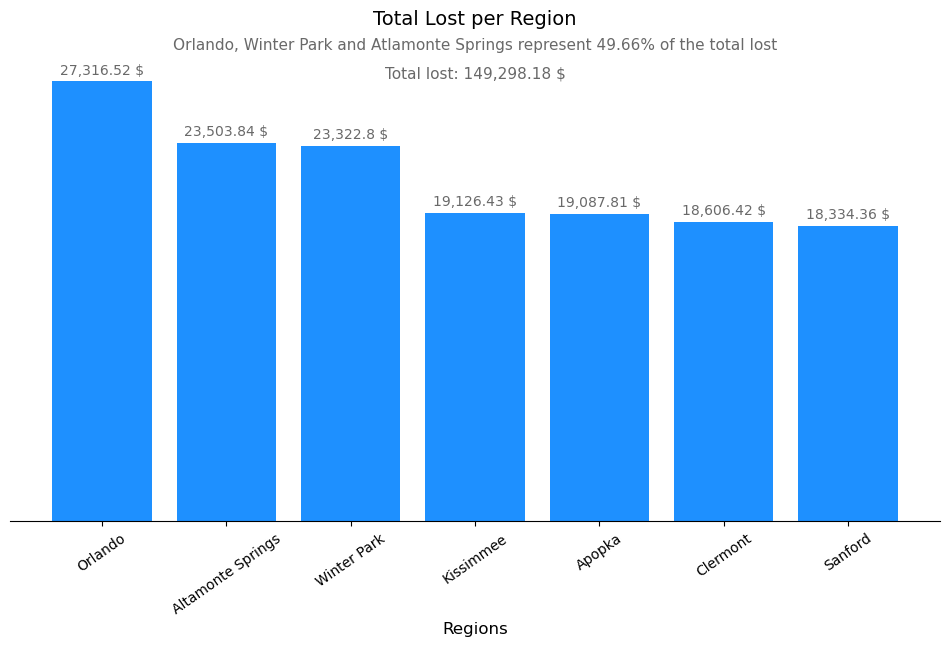

In [67]:
#1 Bar Chart - Total Lost per Region

total_lost_value = df_nodup['total_lost_value'].sum()
formatted_lost_value = f'{round(total_lost_value,2):,} $'
total_lost = df_nodup.groupby('region')['total_lost_value'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (12,6)) 
bar_chart = ax.bar(total_lost.index, total_lost.values, color = 'dodgerblue')

ax.set_title('Total Lost per Region', fontsize = 14, pad=25)
ax.set_xlabel('Regions', fontsize = 12)
ax.set_ylabel('') # Removethe Y label
ax.set_axisbelow(True) 
ax.grid(True, axis='y', alpha = 0.4, linestyle = '-')
ax.grid(False, axis='x') #bug ?
ax.bar_label(bar_chart, labels=[f'{round(x,2):,} $' for x in total_lost.values], padding = 3, fontsize = 10, color = "dimgrey") #For displaying the values on top of the bars

sns.despine(left=True)

plt.xticks(rotation=35)
plt.yticks([]) #Remove the Y label values
plt.text(0.5, 1.02, 'Orlando, Winter Park and Atlamonte Springs represent 49.66% of the total lost', transform = ax.transAxes, ha='center', fontsize = 11, color = "dimgray")
plt.text(0.5, 0.96, 'Total lost: ' + str(formatted_lost_value) , transform = ax.transAxes, ha='center', fontsize = 11, color = "dimgray")


plt.show()


In [68]:
# Calculate the percentage of the top 3 regions
regions = ['Orlando', 'Altamonte Springs', 'Winter Park']
total_lost_region = df.groupby('region')['product_amount_price'].sum()
select_total = total_lost_region.loc[regions].sum()
total_lost = total_lost_region.sum()
percentage = (select_total/total_lost)*100
print(percentage)

49.66474107937191


### 2. Scatterplot Charts - Total Lost per Driver and Customer

#### 2.1 Total Lost per Driver

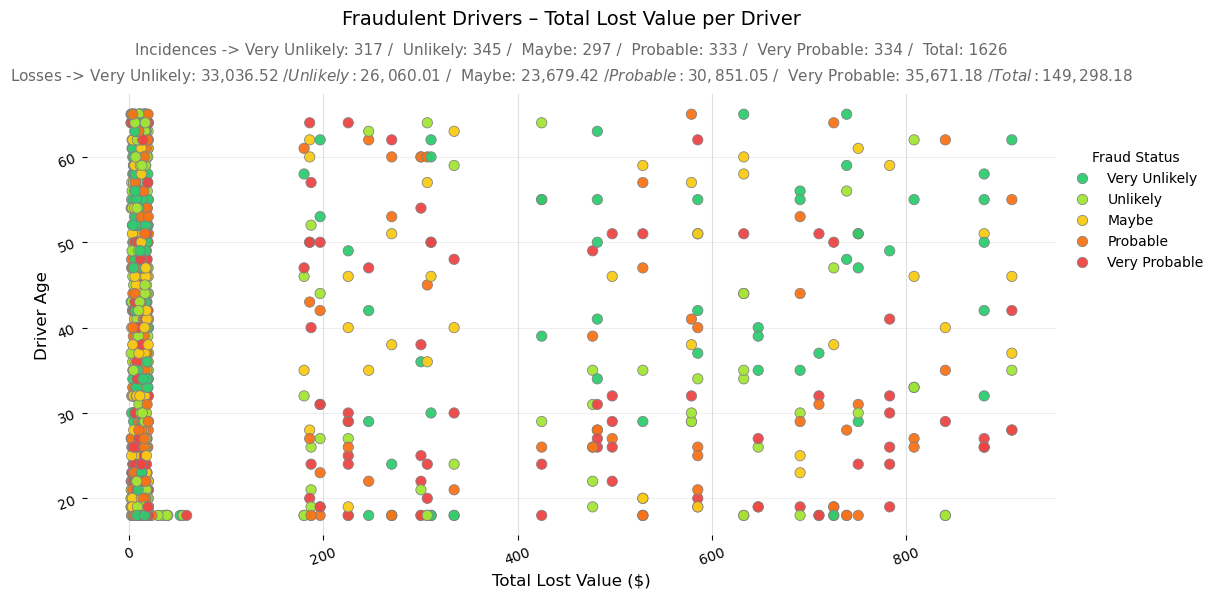

In [69]:
#2 Scatterplot Chart – total lost per driver

fraudulent_drivers = df_nodup[
    (df_nodup['fraudulent_driver?'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=fraudulent_drivers,
    x='total_lost_value',
    y='driver_age',
    hue='fraudulent_driver?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('Fraudulent Drivers – Total Lost Value per Driver', fontsize=14, pad=50)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('Driver Age', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')
ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20) 

# Total of incidences
total_cases = fraudulent_drivers['driver_age'].count()
veryunlikely = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely']['driver_age'].count()
unlikely = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Unlikely']['driver_age'].count()
maybe = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Maybe']['driver_age'].count()
probable = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Probable']['driver_age'].count()
veryprobable = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Probable']['driver_age'].count()

# Total of Loss
total_loss = fraudulent_drivers['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'
veryunlikely_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely']['total_lost_value'].sum()
formatted_veryunlikely_loss = f'{round(veryunlikely_loss,2):,} $'
unlikely_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Unlikely']['total_lost_value'].sum()
formatted_unlikely_loss = f'{round(unlikely_loss,2):,} $'
maybe_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Maybe']['total_lost_value'].sum()
formatted_maybe_loss = f'{round(maybe_loss,2):,} $'
probable_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Probable']['total_lost_value'].sum()
formatted_probable_loss = f'{round(probable_loss,2):,} $'
veryprobable_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Probable']['total_lost_value'].sum()
formatted_veryprobable_loss = f'{round(veryprobable_loss,2):,} $'

#total_cases_150 = fraudulent_drivers_150['driver_age'].count()
#perc_150_total = total_cases_150/total_cases

#plt.text(0.5, 1.09, 'Total of incidences down below', transform=ax.transAxes, ha='center', fontsize=11, color='dimgray')
#plt.text(0.5, 1.03, 'Total lost value: ' + formatted_loss, transform=ax.transAxes, ha='center', fontsize=11, color='dimgray')
plt.text(0.5, 1.09, 
         'Incidences -> ' +
         'Very Unlikely: ' + str(veryunlikely) + ' / ' +
         ' Unlikely: ' + str(unlikely) + ' / ' +
         ' Maybe: ' + str(maybe) + ' / ' +
         ' Probable: ' + str(probable) + ' / ' +
         ' Very Probable: ' + str(veryprobable) + ' / ' +
         ' Total: ' + str(total_cases),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.text(0.5, 1.03, 
         'Losses -> ' +
         'Very Unlikely: ' + str(formatted_veryunlikely_loss) + ' / ' +
         ' Unlikely: ' + str(formatted_unlikely_loss) + ' / ' +
         ' Maybe: ' + str(formatted_maybe_loss) + ' / ' +
         ' Probable: ' + str(formatted_probable_loss) + ' / ' +
         ' Very Probable: ' + str(formatted_veryprobable_loss) + ' / ' +
         ' Total: ' + str(formatted_loss),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.show()



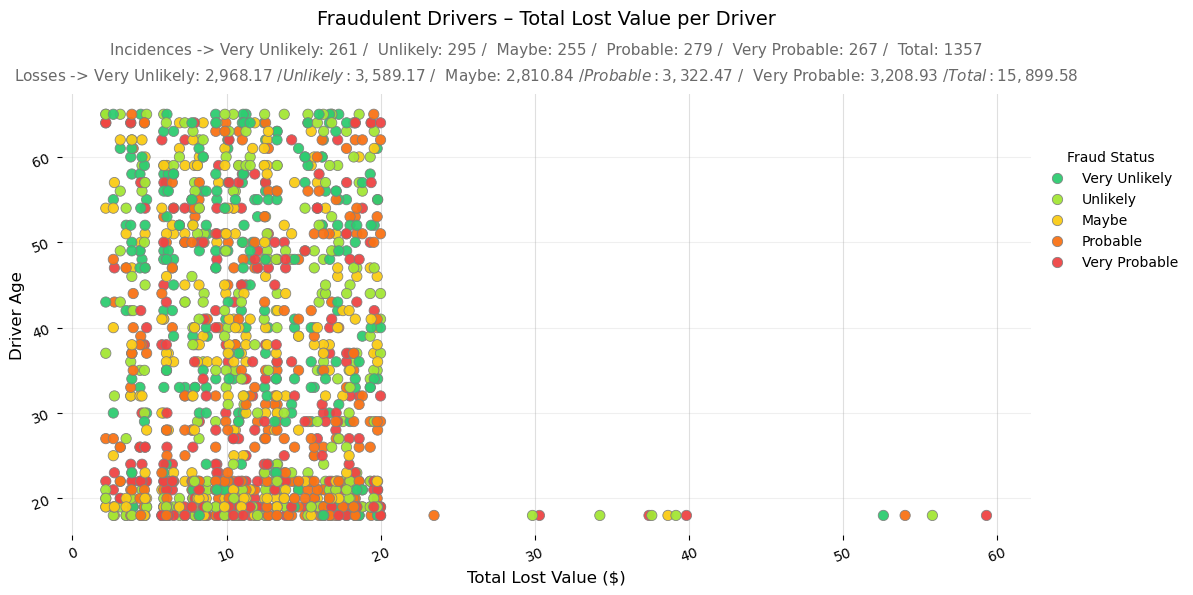

In [70]:
#2 Scatterplot Chart – total lost per driver less than 150 $

fraudulent_drivers = df_nodup[
    (df_nodup['fraudulent_driver?'].notna()) &
    (df_nodup['total_lost_value'] < 150)
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',        # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=fraudulent_drivers,
    x='total_lost_value',
    y='driver_age',
    hue='fraudulent_driver?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('Fraudulent Drivers – Total Lost Value per Driver', fontsize=14, pad=50)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('Driver Age', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')
ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20) 

# Total of incidences
total_cases = fraudulent_drivers['driver_age'].count()
veryunlikely = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely']['driver_age'].count()
unlikely = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Unlikely']['driver_age'].count()
maybe = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Maybe']['driver_age'].count()
probable = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Probable']['driver_age'].count()
veryprobable = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Probable']['driver_age'].count()

# Total of Loss
total_loss = fraudulent_drivers['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'
veryunlikely_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Unlikely']['total_lost_value'].sum()
formatted_veryunlikely_loss = f'{round(veryunlikely_loss,2):,} $'
unlikely_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Unlikely']['total_lost_value'].sum()
formatted_unlikely_loss = f'{round(unlikely_loss,2):,} $'
maybe_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Maybe']['total_lost_value'].sum()
formatted_maybe_loss = f'{round(maybe_loss,2):,} $'
probable_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Probable']['total_lost_value'].sum()
formatted_probable_loss = f'{round(probable_loss,2):,} $'
veryprobable_loss = fraudulent_drivers[fraudulent_drivers['fraudulent_driver?'] == 'Very Probable']['total_lost_value'].sum()
formatted_veryprobable_loss = f'{round(veryprobable_loss,2):,} $'

#total_cases_150 = fraudulent_drivers_150['driver_age'].count()
#perc_150_total = total_cases_150/total_cases

#plt.text(0.5, 1.09, 'Total of incidences down below', transform=ax.transAxes, ha='center', fontsize=11, color='dimgray')
#plt.text(0.5, 1.03, 'Total lost value: ' + formatted_loss, transform=ax.transAxes, ha='center', fontsize=11, color='dimgray')
plt.text(0.5, 1.09, 
         'Incidences -> ' +
         'Very Unlikely: ' + str(veryunlikely) + ' / ' +
         ' Unlikely: ' + str(unlikely) + ' / ' +
         ' Maybe: ' + str(maybe) + ' / ' +
         ' Probable: ' + str(probable) + ' / ' +
         ' Very Probable: ' + str(veryprobable) + ' / ' +
         ' Total: ' + str(total_cases),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.text(0.5, 1.03, 
         'Losses -> ' +
         'Very Unlikely: ' + str(formatted_veryunlikely_loss) + ' / ' +
         ' Unlikely: ' + str(formatted_unlikely_loss) + ' / ' +
         ' Maybe: ' + str(formatted_maybe_loss) + ' / ' +
         ' Probable: ' + str(formatted_probable_loss) + ' / ' +
         ' Very Probable: ' + str(formatted_veryprobable_loss) + ' / ' +
         ' Total: ' + str(formatted_loss),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.show()



With the previous two charts before we can have a important insight

- 83.45% (1357 cases) of our cases happens with low losses, representing approximately 10.65% (15,899.58$) of our total loss.
- 16.55% (1626 cases) of all cases represent 89.35% (133.398,60$) of our total loss.

Our efforts should be directed to prevent the loss of orders with high prices. Orders with low amount of money 

#### 2.2 Total Lost per Customer

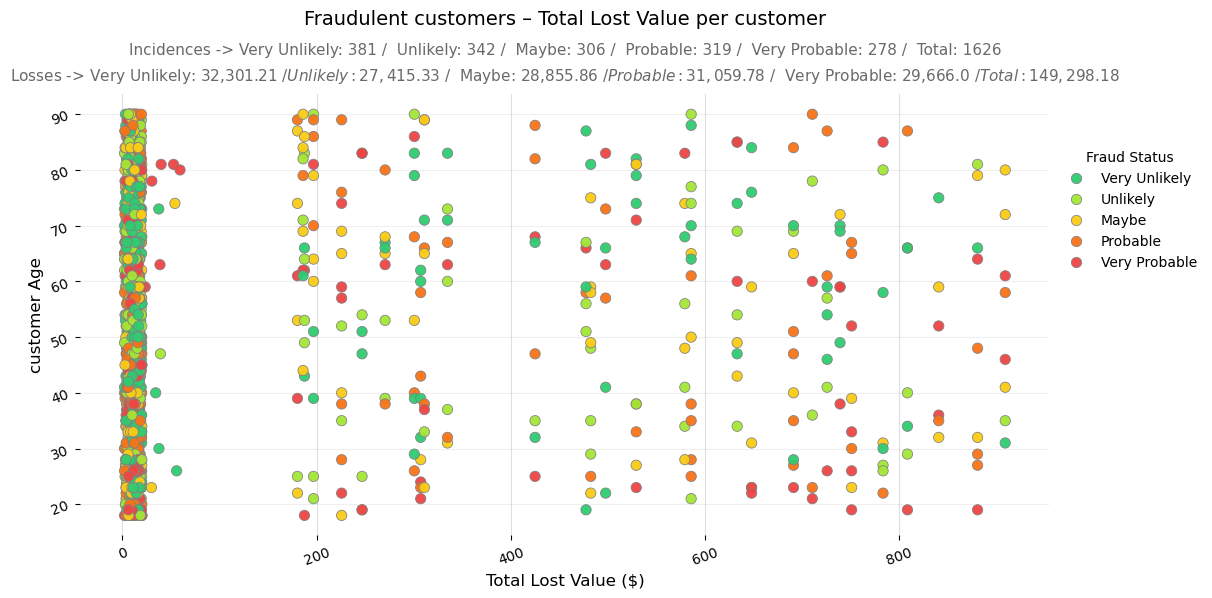

In [71]:
#2 Scatterplot Chart – total lost per customer

fraudulent_customer = df_nodup[
    (df_nodup['fraudulent_customer?'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=fraudulent_customer,
    x='total_lost_value',
    y='customer_age',
    hue='fraudulent_customer?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('Fraudulent customers – Total Lost Value per customer', fontsize=14, pad=50)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('customer Age', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')
ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20) 

# Total of incidences
total_cases = fraudulent_customer['customer_age'].count()
veryunlikely = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Unlikely']['customer_age'].count()
unlikely = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Unlikely']['customer_age'].count()
maybe = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Maybe']['customer_age'].count()
probable = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Probable']['customer_age'].count()
veryprobable = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Probable']['customer_age'].count()

# Total of Loss
total_loss = fraudulent_customer['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'
veryunlikely_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Unlikely']['total_lost_value'].sum()
formatted_veryunlikely_loss = f'{round(veryunlikely_loss,2):,} $'
unlikely_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Unlikely']['total_lost_value'].sum()
formatted_unlikely_loss = f'{round(unlikely_loss,2):,} $'
maybe_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Maybe']['total_lost_value'].sum()
formatted_maybe_loss = f'{round(maybe_loss,2):,} $'
probable_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Probable']['total_lost_value'].sum()
formatted_probable_loss = f'{round(probable_loss,2):,} $'
veryprobable_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Probable']['total_lost_value'].sum()
formatted_veryprobable_loss = f'{round(veryprobable_loss,2):,} $'

plt.text(0.5, 1.09, 
         'Incidences -> ' +
         'Very Unlikely: ' + str(veryunlikely) + ' / ' +
         ' Unlikely: ' + str(unlikely) + ' / ' +
         ' Maybe: ' + str(maybe) + ' / ' +
         ' Probable: ' + str(probable) + ' / ' +
         ' Very Probable: ' + str(veryprobable) + ' / ' +
         ' Total: ' + str(total_cases),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.text(0.5, 1.03, 
         'Losses -> ' +
         'Very Unlikely: ' + str(formatted_veryunlikely_loss) + ' / ' +
         ' Unlikely: ' + str(formatted_unlikely_loss) + ' / ' +
         ' Maybe: ' + str(formatted_maybe_loss) + ' / ' +
         ' Probable: ' + str(formatted_probable_loss) + ' / ' +
         ' Very Probable: ' + str(formatted_veryprobable_loss) + ' / ' +
         ' Total: ' + str(formatted_loss),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.show()



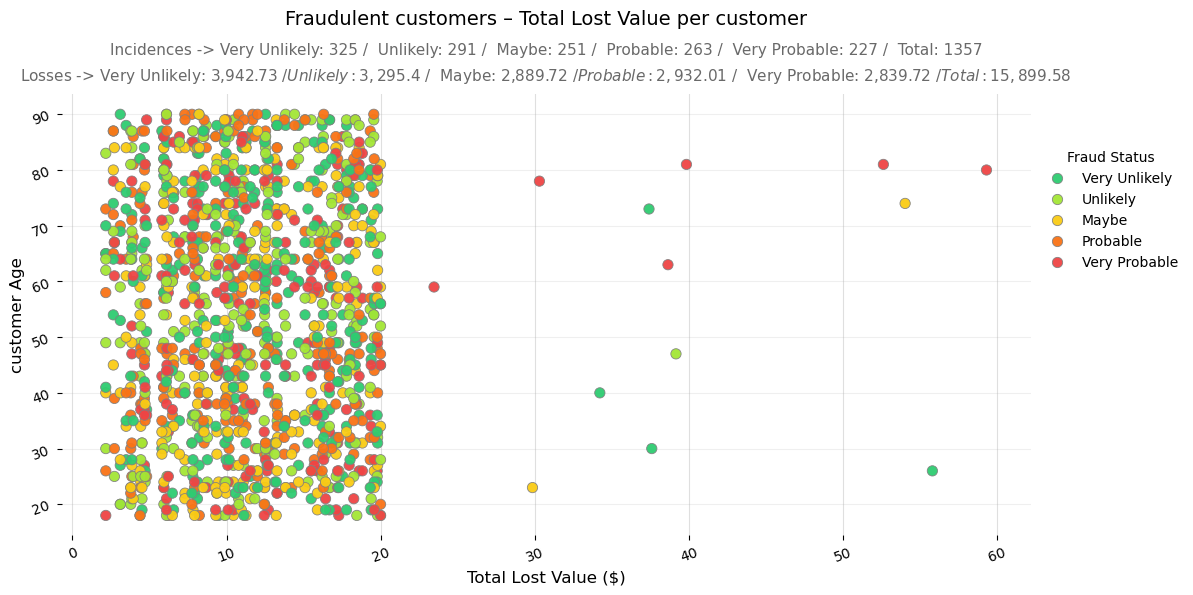

In [72]:
#2 Scatterplot Chart – total lost per customer below 150$

fraudulent_customer = df_nodup[
    (df_nodup['fraudulent_customer?'].notna()) &
    (df_nodup['total_lost_value']<150)
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=fraudulent_customer,
    x='total_lost_value',
    y='customer_age',
    hue='fraudulent_customer?',
    palette=palette,
    s=55,
    edgecolor='gray',
    alpha=0.95,
    ax=ax
)

ax.set_title('Fraudulent customers – Total Lost Value per customer', fontsize=14, pad=50)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('customer Age', fontsize=12)
ax.set_axisbelow(True)
ax.grid(True, axis='x', alpha=0.4, linestyle='-')
ax.grid(True, axis='y', alpha=0.2, linestyle='-')
ax.legend(
    title='Fraud Status',
    loc='upper left',
    bbox_to_anchor=(1.00, 0.90),
    fontsize=10,
    title_fontsize=10,
    frameon=False
)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks(rotation=20)
plt.yticks(rotation=20) 

# Total of incidences
total_cases = fraudulent_customer['customer_age'].count()
veryunlikely = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Unlikely']['customer_age'].count()
unlikely = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Unlikely']['customer_age'].count()
maybe = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Maybe']['customer_age'].count()
probable = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Probable']['customer_age'].count()
veryprobable = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Probable']['customer_age'].count()

# Total of Loss
total_loss = fraudulent_customer['total_lost_value'].sum()
formatted_loss = f'{round(total_loss,2):,} $'
veryunlikely_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Unlikely']['total_lost_value'].sum()
formatted_veryunlikely_loss = f'{round(veryunlikely_loss,2):,} $'
unlikely_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Unlikely']['total_lost_value'].sum()
formatted_unlikely_loss = f'{round(unlikely_loss,2):,} $'
maybe_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Maybe']['total_lost_value'].sum()
formatted_maybe_loss = f'{round(maybe_loss,2):,} $'
probable_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Probable']['total_lost_value'].sum()
formatted_probable_loss = f'{round(probable_loss,2):,} $'
veryprobable_loss = fraudulent_customer[fraudulent_customer['fraudulent_customer?'] == 'Very Probable']['total_lost_value'].sum()
formatted_veryprobable_loss = f'{round(veryprobable_loss,2):,} $'

plt.text(0.5, 1.09, 
         'Incidences -> ' +
         'Very Unlikely: ' + str(veryunlikely) + ' / ' +
         ' Unlikely: ' + str(unlikely) + ' / ' +
         ' Maybe: ' + str(maybe) + ' / ' +
         ' Probable: ' + str(probable) + ' / ' +
         ' Very Probable: ' + str(veryprobable) + ' / ' +
         ' Total: ' + str(total_cases),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.text(0.5, 1.03, 
         'Losses -> ' +
         'Very Unlikely: ' + str(formatted_veryunlikely_loss) + ' / ' +
         ' Unlikely: ' + str(formatted_unlikely_loss) + ' / ' +
         ' Maybe: ' + str(formatted_maybe_loss) + ' / ' +
         ' Probable: ' + str(formatted_probable_loss) + ' / ' +
         ' Very Probable: ' + str(formatted_veryprobable_loss) + ' / ' +
         ' Total: ' + str(formatted_loss),
         transform=ax.transAxes, 
         ha='center', 
         fontsize=11, 
         color='dimgray')

plt.show()



With the previous two charts before we can have a important insight

- 83.45% (1357 cases) of our cases happens with low losses, representing approximately 10.65% (15,899.58$) of our total loss.
- 16.55% (1626 cases) of all cases represent 89.35% (133.398,60$) of our total loss.

Our efforts should be directed to prevent the loss of orders with high prices. Orders with low amount of money 

Doing this analysis we conclude an overall insight that the major of losses were realized by the minor of orders. We couldn't analyse more precisely who is the one more responsible for our losses: customer or drivers. For that, we may use a different approach in the future.

### 3. Pie Chart

#### 3.1 Total Lost per Customer

C:\Users\amcys\AppData\Local\Temp\ipykernel_3120\1407873194.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_loss = fraudulent_customer.groupby('fraudulent_customer?')['total_lost_value'].sum().sort_values(ascending=False)


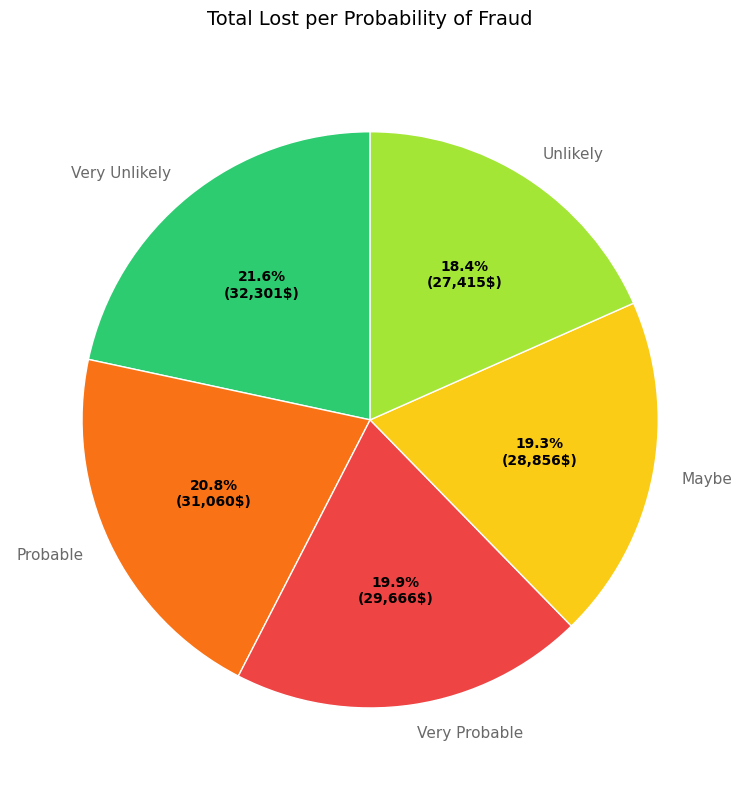

In [73]:
# Pie Chart – Total Lost per Probability of Fraud by customer

fraudulent_customer = df_nodup[
    (df_nodup['fraudulent_customer?'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

# Calculate total lost value per fraud category
fraud_loss = fraudulent_customer.groupby('fraudulent_customer?')['total_lost_value'].sum().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    fraud_loss,
    labels=fraud_loss.index,
    autopct=lambda p: f'{p:.1f}%\n({fraud_loss.sum() * p / 100:,.0f}$)',
    colors=[palette[label] for label in fraud_loss.index],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'color': 'dimgray', 'fontsize': 11}
)

# Title and styling
ax.set_title('Total Lost per Probability of Fraud', fontsize=14, pad=25)
plt.setp(autotexts, size=10, weight='bold', color='black')
plt.tight_layout()
plt.show()


#### 3.2 Total Lost per Driver

C:\Users\amcys\AppData\Local\Temp\ipykernel_3120\1471919117.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_loss = fraudulent_driver.groupby('fraudulent_driver?')['total_lost_value'].sum().sort_values(ascending=False)


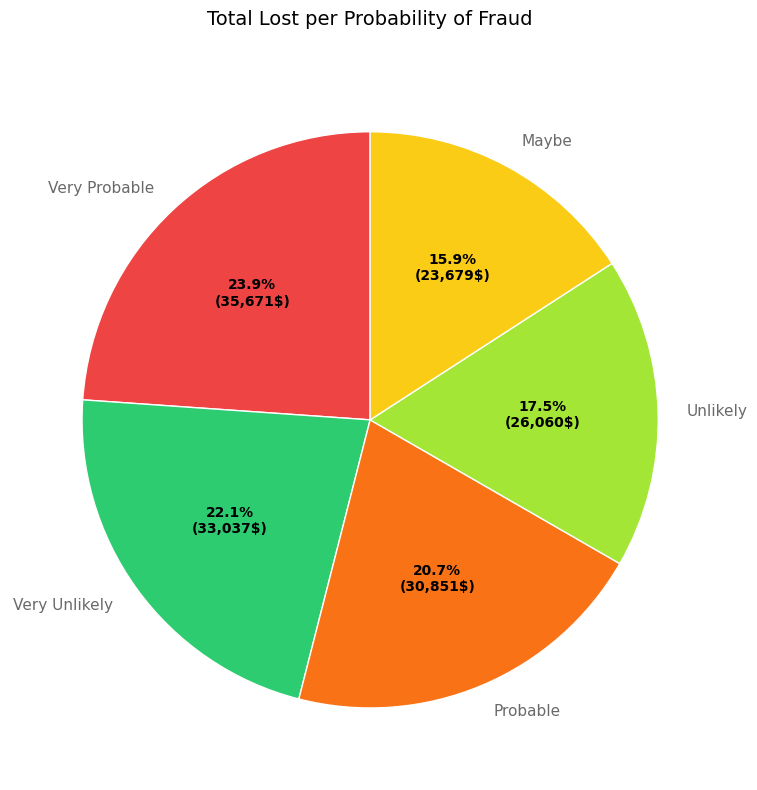

In [74]:
# Pie Chart – Total Lost per Probability of Fraud by driver

fraudulent_driver = df_nodup[
    (df_nodup['fraudulent_driver?'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

palette = {
    'Very Unlikely': '#2ecc71',   # green
    'Unlikely': '#a3e635',        # light green
    'Maybe': '#facc15',           # yellow
    'Probable': '#f97316',        # orange
    'Very Probable': '#ef4444'    # red
}

# Calculate total lost value per fraud category
fraud_loss = fraudulent_driver.groupby('fraudulent_driver?')['total_lost_value'].sum().sort_values(ascending=False)

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    fraud_loss,
    labels=fraud_loss.index,
    autopct=lambda p: f'{p:.1f}%\n({fraud_loss.sum() * p / 100:,.0f}$)',
    colors=[palette[label] for label in fraud_loss.index],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'color': 'dimgray', 'fontsize': 11}
)

# Title and styling
ax.set_title('Total Lost per Probability of Fraud', fontsize=14, pad=25)
plt.setp(autotexts, size=10, weight='bold', color='black')
plt.tight_layout()
plt.show()


### 4. Total Lost During the Day (Hours)

In [75]:
df_nodup.head()

,date,order_id,order_amount,region,items_delivered,items_missing,delivery_hour,customer_id,customer_name,customer_age,driver_id,driver_name,driver_age,driver_trips,missing_product_name,missing_product_category,product_amount_price,customer_orders,multiplier,total_lost_value,customer_incidence,lost_incidence_customer,fraudulent_customer?,driver_incidence,lost_incidence_driver,fraudulent_driver?
0,2023-02-12,b0b0ed0b-6d92-4747-a27d-32fa5b293d48,341.92,Altamonte Springs,19,0,04:02:37,WCID5359,Amanda Frank,48,WDID10634,Kevin Castillo DDS,65,48,NaN,NaN,NaN,10,NaN,NaN,1.0,0.100,Very Unlikely,3.0,0.062,Unlikely
1,2023-02-12,052ef301-b6a1-4e08-a6eb-8c92f64c11af,113.50,Clermont,8,0,17:58:42,WCID5000,Dustin Spencer,38,WDID10766,Heather Welch,60,25,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-12,1c052a51-448f-4859-a739-7066ac41b8e8,442.30,Apopka,19,0,17:14:01,WCID5040,Amy Harrison,72,WDID10966,Shannon Reyes,43,24,NaN,NaN,NaN,11,NaN,NaN,1.0,0.091,Very Unlikely,NaN,NaN,NaN
3,2023-02-12,ca4bb404-bb71-40ee-925d-b816c97f4a9c,277.32,Clermont,13,0,03:52:42,WCID5867,Jose Jennings,85,WDID11100,Brett Young,48,39,NaN,NaN,NaN,7,NaN,NaN,1.0,0.143,Very Unlikely,NaN,NaN,NaN
4,2023-02-12,9cc29314-15ad-4259-9547-7b70177ed6de,462.46,Clermont,15,0,14:01:55,WCID6045,Zachary Campbell,60,WDID09899,Stephen Patton,18,47,NaN,NaN,NaN,5,NaN,NaN,1.0,0.200,Unlikely,NaN,NaN,NaN


In [76]:
df_nodup['delivery_hour'].iloc[0]

datetime.time(4, 2, 37)

C:\Users\amcys\AppData\Local\Temp\ipykernel_3120\1632149528.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_customer['hour'] = fraudulent_customer['delivery_hour'].apply(lambda t: t.hour)


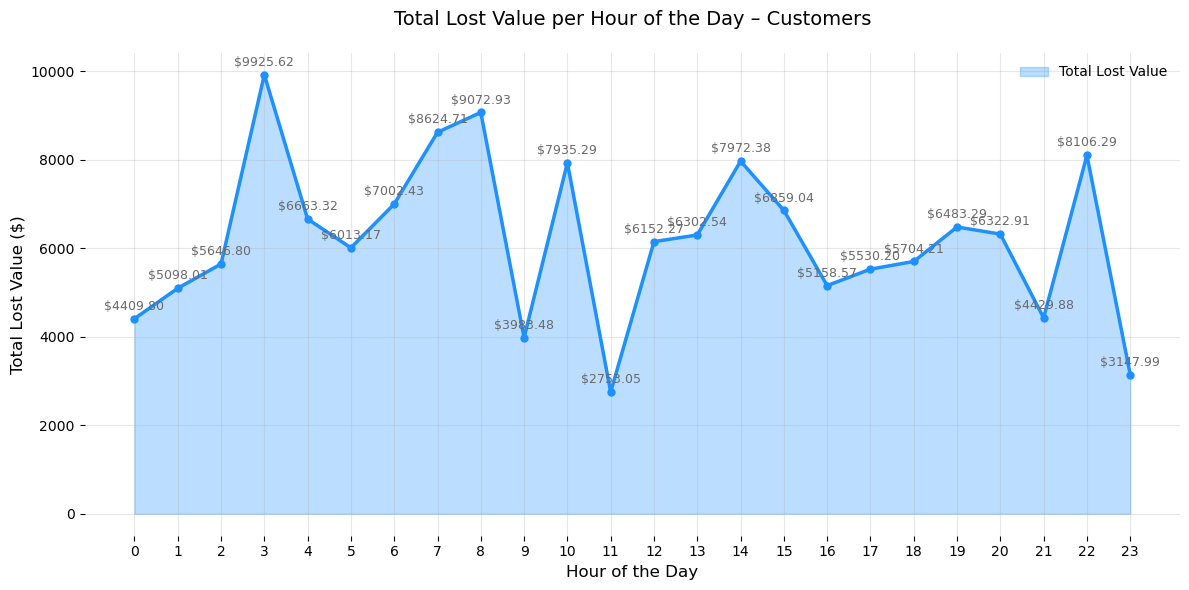

In [77]:
# Area Line Chart – Total Lost Value by Hour of the Day per Customers

fraudulent_customer = df_nodup[
    (df_nodup['fraudulent_customer?'].notna()) &
    (df_nodup['total_lost_value'].notna()) &
    (df_nodup['delivery_hour'].notna())
]

# Convert delivery_hour (datetime.time) to numeric hour (0–23)
fraudulent_customer['hour'] = fraudulent_customer['delivery_hour'].apply(lambda t: t.hour)

# Calculate total lost per hour
hourly_loss = fraudulent_customer.groupby('hour')['total_lost_value'].sum().reset_index()

# Calculate total overall lost
total_lost = hourly_loss['total_lost_value'].sum()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.fill_between(hourly_loss['hour'], hourly_loss['total_lost_value'],
                color='dodgerblue', alpha=0.3, label='Total Lost Value')
ax.plot(hourly_loss['hour'], hourly_loss['total_lost_value'],
        color='dodgerblue', linewidth=2.5, marker='o', markersize=5)

# Annotate each point with total lost value
for i, row in hourly_loss.iterrows():
    ax.text(row['hour'], row['total_lost_value'] + (hourly_loss['total_lost_value'].max() * 0.02),
            f"${row['total_lost_value']:.2f}", ha='center', fontsize=9, color='dimgray')

# Title includes total lost
ax.set_title(f'Total Lost Value per Hour of the Day – Customers', fontsize=14, pad=20)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Total Lost Value ($)', fontsize=12)

ax.grid(True, alpha=0.3, linestyle='-')
sns.despine(left=True, bottom=True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.legend(frameon=False)
plt.show()


With this chart, we can have a good insight. The 3 biggest "peaks" of total losses happens before 8 AM. This is the period where the company should have more attention to.

### 5. Horizontal Bar Chart

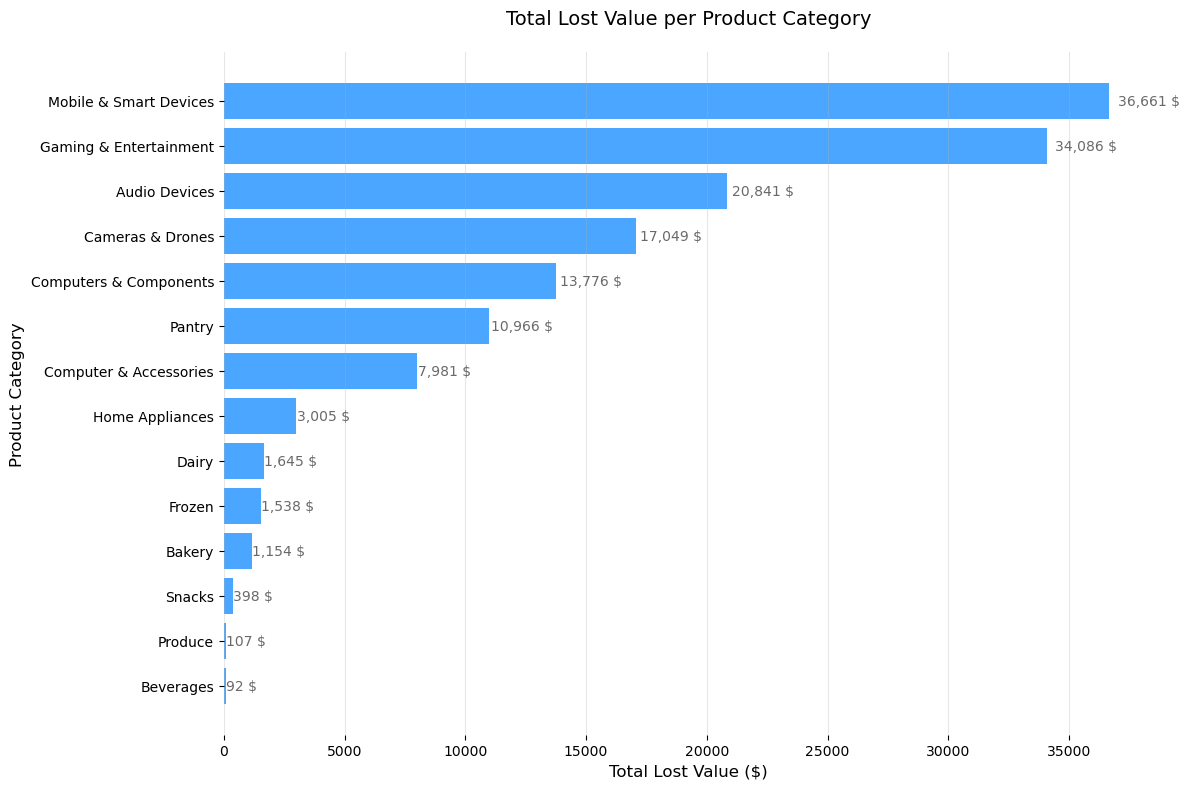

In [78]:
# Horizontal Bar Chart – Total Lost per Product Category

# Filter relevant rows
category_loss = df_nodup[
    (df_nodup['missing_product_category'].notna()) &
    (df_nodup['total_lost_value'].notna())
]

# Group and sum total lost per category
category_loss = (
    category_loss.groupby('missing_product_category')['total_lost_value']
    .sum()
    .sort_values(ascending=True)  # ascending for better horizontal layout
)

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bars
bars = ax.barh(category_loss.index, category_loss.values, color='dodgerblue', alpha=0.8)

# Title and labels
ax.set_title('Total Lost Value per Product Category', fontsize=14, pad=20)
ax.set_xlabel('Total Lost Value ($)', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + (width * 0.01),              # slight offset to the right
            bar.get_y() + bar.get_height()/2,    # centered vertically
            f'{width:,.0f} $',
            va='center', ha='left', fontsize=10, color='dimgray')

# Style
ax.grid(True, axis='x', alpha=0.3, linestyle='-')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


This was the most impactful chart. Here, we could analyse that the top 5 products of lost value are responsible for 81.99% of the total loss. The efforts should be directed to those products with the aim of avoiding future losses.